# Working with time series exercises

07 February 2023


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from vega_datasets import data

In [2]:
# getting sf_temps data

df = data.sf_temps()
df.sample(3)

,temp,date
5073,65.2,2010-07-31 10:00:00
925,55.7,2010-02-08 13:00:00
2045,49.3,2010-03-27 06:00:00


Use the above dataset for the following exercises:

    1. Resample by the day and take the average temperature. Visualize the average temperature over time.
    2. Write the code necessary to visualize the minimum temperature over time.
    3. Write the code necessary to visualize the maximum temperature over time.
    4. Which month is the coldest, on average?
    5. Which month has the highest average temperature?
    6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
    _Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.


### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [3]:
# info on df

df.info() # no nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [4]:
# describing stats

df.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,8759.0,56.924112,6.107079,45.6,52.3,56.5,60.7,72.2


In [5]:
# resetting date to index

df = df.set_index('date')

In [6]:
df = df.sort_index(ascending = True)
df.head(3)

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9


In [7]:
# resampling by day and getting avg temp

df_day = df.resample('D').median()
df_day.head()

,temp
date,
2010-01-01,49.20
2010-01-02,49.30
2010-01-03,49.35
2010-01-04,49.35
2010-01-05,49.40


<AxesSubplot:xlabel='date'>

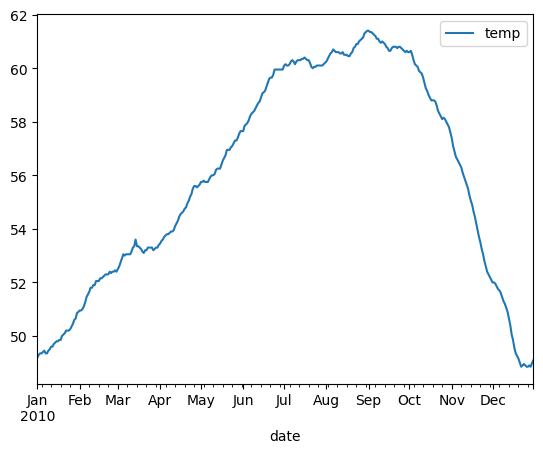

In [8]:
# ziv the avg daily temp over time

df_day.plot()

### 2. Write the code necessary to visualize the minimum (daily ?) temperature over time.

In [9]:
# getting daily min temp

daily_min = df['temp'].resample('d').min()

# assigning daily min temp to df
df['daily_min'] = daily_min

<AxesSubplot:xlabel='date'>

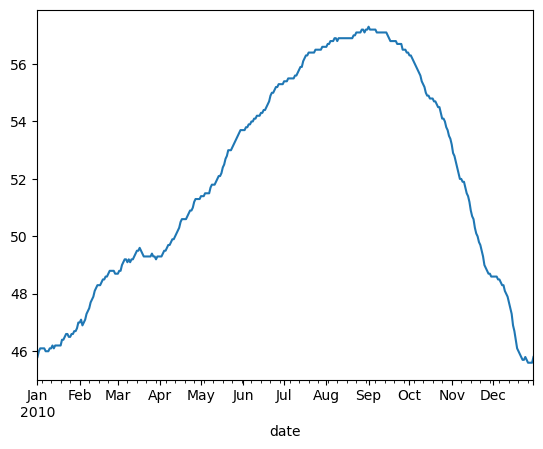

In [10]:
# plotting daily min tem

daily_min.plot()

### 3. Write the code necessary to visualize the maximum temperature over time.

In [11]:
# getting daily max temp

daily_max = df['temp'].resample('d').max()

# assigning daily min temp to df
df['daily_max'] = daily_max

<AxesSubplot:xlabel='date'>

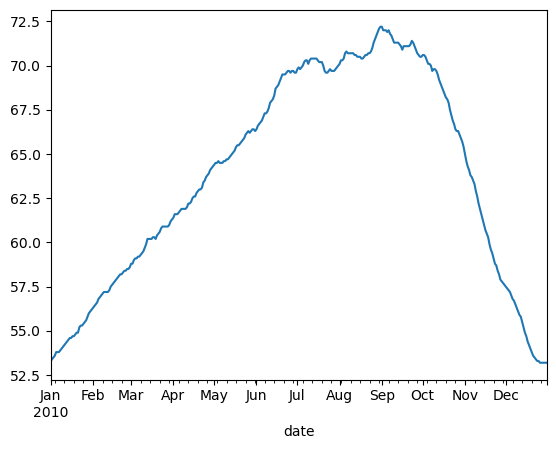

In [12]:
# plotting daily max temp

daily_max.plot()

### 4. Which month is the coldest, on average?

In [13]:
# daterange = 1 year

df.index.max() - df.index.min()

Timedelta('364 days 23:00:00')

In [14]:
month_avg = df['temp'].resample('M').mean()

month_avg.idxmin()

# january is the coldest month on average

Timestamp('2010-01-31 00:00:00', freq='M')

### 5. Which month has the highest average temperature?

In [15]:
month_avg.idxmax()

# september is, on average, the warmest month

Timestamp('2010-09-30 00:00:00', freq='M')

### 6. Resample by the day and calculate the min and max temp for the day. (Hint : .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day.  Which month has the highest daily temperature variability?

In [16]:
# attempting to make column with temp differences

df['essai'] = (df['daily_min'].resample('d').sum()) - (df['daily_min'].resample('d').sum())

In [17]:
# verifying that the daily_min col is in fact the avg daily min

df['daily_min'].resample('d').sum().head(3)

date
2010-01-01    45.8
2010-01-02    46.0
2010-01-03    46.1
Freq: D, Name: daily_min, dtype: float64

In [18]:
# trying aggregation

# daily_min_max_df = df.resample('D').agg(['min', 'max'])

# daily_min_max_df.head(3)

In [19]:
# min / max for each col

# daily_min_max_df.max() - daily_min_max_df.min()

In [20]:
# another attmept at subtraction
# all the rows are 0 

# (daily_min_max_df['temp'].resample('d').max() - daily_min_max_df['temp'].resample('d').min()).head(30)

In [21]:
# calculating dif btwn daily min and max

daily_dif = df['daily_max'] - df['daily_min']
df['daily_dif'] = daily_dif

In [22]:
# imputing 0 to nulls

df['daily_dif'] = df['daily_dif'].fillna(0)

In [23]:
df['daily_dif'].idxmax()

# august has the largest daily temp variability

Timestamp('2010-08-31 00:00:00')

<AxesSubplot:xlabel='date'>

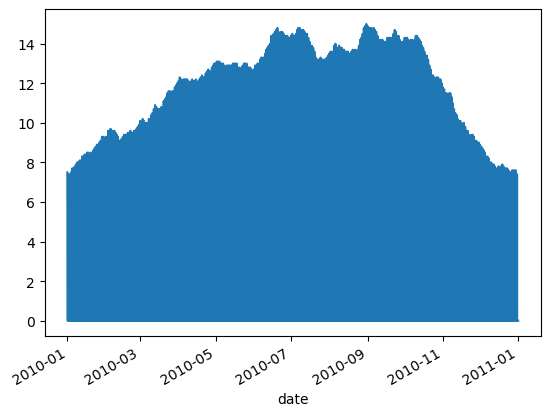

In [24]:
# plotting daily difference in temp

df['daily_dif'].plot()


### _Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [25]:
# daily average

day_avg = df['temp'].resample('d').mean()

In [26]:
d = ({'daily_max' : daily_max, 'daily_min' : daily_min, 'day_avg' : day_avg})

In [27]:
# creating temperature high-low-avg DF

temp_var = pd.DataFrame(d)
    
temp_var.head(3)

,daily_max,daily_min,day_avg
date,,,
2010-01-01,53.3,45.8,49.170833
2010-01-02,53.4,46.0,49.304167
2010-01-03,53.5,46.1,49.391667


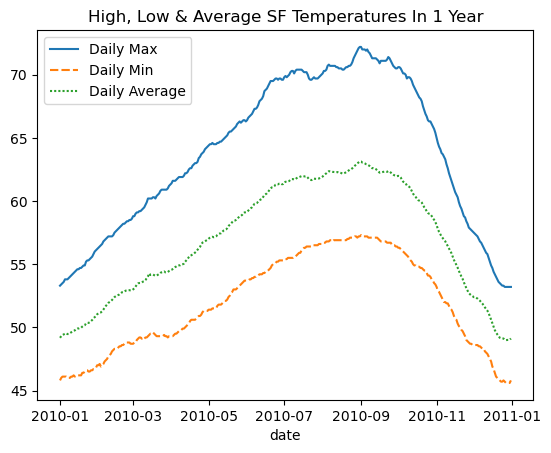

In [28]:
# plotting all three

sns.lineplot(data = temp_var)
plt.legend(labels=['Daily Max', 'Daily Min', 'Daily Average'])
plt.title('High, Low & Average SF Temperatures In 1 Year')
plt.show()

# Use the ```data.seattle_weather()``` dataset for the following exercises :

    1. Which year and month combination has the highest amount of precipitation?
    2. Visualize the amount of monthly precipitation over time.
    3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.
    4. Which year-month combination is the windiest?
    5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
    6. In which month does it rain the most?
    7. Which month has the most number of days with a non-zero amount of precipitation?



In [29]:
# acquiring data 

seattle_df = data.seattle_weather()
seattle_df.head(3)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain


In [30]:
# looking at data

print(seattle_df.describe())
print()
print(seattle_df.info())
print()
print(seattle_df.shape)

       precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64    

In [31]:
# setting date to index

seattle_df = seattle_df.set_index('date')

In [32]:
seattle_df.head(3)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain


### 1. Which year and month combination has the highest amount of precipitation?

In [43]:
# one way to do it

seattle_df['precipitation'].resample('m').max().sort_values(ascending = False).nlargest(1)

date
2015-03-31    55.9
Name: precipitation, dtype: float64

In [44]:
# another way to do it

seattle_df['precipitation'].idxmax()

Timestamp('2015-03-15 00:00:00')

### 2. Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

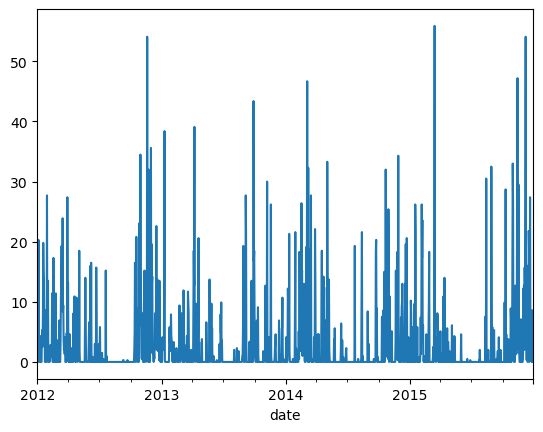

In [47]:
# plotting monthly precip

seattle_df['precipitation'].plot()

### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

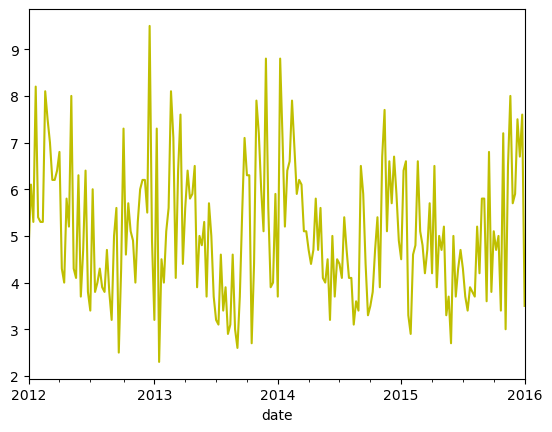

In [59]:
# plotting max weekly wind

seattle_df['wind'].resample('w').max().plot(c = 'y')


<AxesSubplot:xlabel='date'>

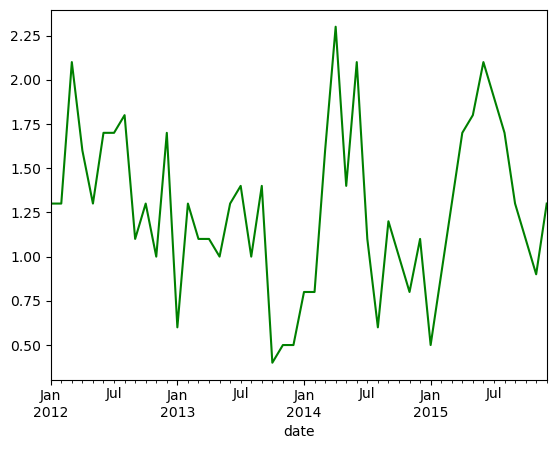

In [57]:
# plotting min monthly wind

seattle_df['wind'].resample('m').min().plot(c = 'g')

### 4. Which year-month combination is the windiest?

In [64]:
seattle_df['wind'].resample('m').max().nlargest(2)

date
2012-12-31    9.5
2013-12-31    8.8
Freq: 12M, Name: wind, dtype: float64

### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [97]:
# finding the sunny days

seattle_df[seattle_df['weather'] == 'sun'].resample('y').max()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-12-31,0.0,34.4,18.3,7.3,sun
2013-12-31,27.7,33.9,18.3,7.1,sun
2014-12-31,19.3,34.4,17.8,7.7,sun
2015-12-31,4.1,35.0,18.3,6.5,sun


In [106]:
# finding the sunny days another way (but, this is a month not a year)

(seattle_df['weather'] == 'sun').value_counts() 

False    747
True     714
Name: weather, dtype: int64

### 6. In which month does it rain the most?